### Task 1 - Binary Representation

Rotating bits means shifting them left or right, but instead of losing the bits that fall off the edge, they get added back to the other side. For example, rotating 01010101 to the right by 1 gives 10101010.

We’ll use bitwise operations like <<, >>, and | to make this happen. It’s like cutting a piece of the binary number and sticking it on the other end.



In [55]:
def rotl(x, n=1):
    """
    Rotates the bits of `x` to the left by `n` places.

    Args:
        x (int): A 32-bit unsigned integer.
        n (int): Number of places to rotate (default is 1).

    Returns:
        int: The result after rotating left, as a 32-bit unsigned integer.
    """
    n = n % 32  # Ensure `n` is within 0-31
    return ((x << n) | (x >> (32 - n))) & 0xFFFFFFFF  # Rotate and mask to 32 bits


# Test rotl
x = 0b11000000000000000000000000000001  # Binary for a 32-bit integer
n = 2
result_rotl = rotl(x, n)

# Display input and output as 32-bit binary strings and unsigned integers
print("=== rotl ===")
print(f"Input (binary):  {format(x, '032b')}")
print(f"Input (uint):    {x}")
print(f"Output (binary): {format(result_rotl, '032b')}")
print(f"Output (uint):   {result_rotl}")




=== rotl ===
Input (binary):  11000000000000000000000000000001
Input (uint):    3221225473
Output (binary): 00000000000000000000000000000111
Output (uint):   7


In [56]:
def rotr(x, n=1):
    """
    Rotates the bits of `x` to the right by `n` places.

    Args:
        x (int): A 32-bit unsigned integer.
        n (int): Number of places to rotate (default is 1).

    Returns:
        int: The result after rotating right, as a 32-bit unsigned integer.
    """
    n = n % 32  # Ensure `n` is within 0-31
    return ((x >> n) | (x << (32 - n))) & 0xFFFFFFFF  # Rotate and mask to 32 bits

# Test rotr
result_rotr = rotr(x, n)
print("=== rotr ===")
print(f"Input (binary):  {format(x, '032b')}")
print(f"Input (uint):    {x}")
print(f"Output (binary): {format(result_rotr, '032b')}")
print(f"Output (uint):   {result_rotr}")

=== rotr ===
Input (binary):  11000000000000000000000000000001
Input (uint):    3221225473
Output (binary): 01110000000000000000000000000000
Output (uint):   1879048192


In [57]:

def ch(x, y, z):
    """
    Chooses bits from `y` where `x` has bits set to 1 and bits from `z` where `x` has bits set to 0.

    Args:
        x (int): A 32-bit unsigned integer.
        y (int): A 32-bit unsigned integer.
        z (int): A 32-bit unsigned integer.

    Returns:
        int: The result of the choose operation, as a 32-bit unsigned integer.
    """
    return (x & y) | (~x & z)

# Test ch
x = 0b11000000000000000000000000000001
y = 0b10101010101010101010101010101010
z = 0b01010101010101010101010101010101
result_ch = ch(x, y, z)
print("=== ch ===")
print(f"Input x (binary): {format(x, '032b')}")
print(f"Input y (binary): {format(y, '032b')}")
print(f"Input z (binary): {format(z, '032b')}")
print(f"Output (binary):  {format(result_ch, '032b')}")
print(f"Output (uint):    {result_ch}")

=== ch ===
Input x (binary): 11000000000000000000000000000001
Input y (binary): 10101010101010101010101010101010
Input z (binary): 01010101010101010101010101010101
Output (binary):  10010101010101010101010101010100
Output (uint):    2505397588


In [58]:
def maj(x, y, z):
    """
    Takes a majority vote of the bits in `x`, `y`, and `z`.

    Args:
        x (int): A 32-bit unsigned integer.
        y (int): A 32-bit unsigned integer.
        z (int): A 32-bit unsigned integer.

    Returns:
        int: The result of the majority operation, as a 32-bit unsigned integer.
    """
    return (x & y) | (x & z) | (y & z)


# Test maj
x = 0b11000000000000000000000000000001
y = 0b10101010101010101010101010101010
z = 0b01010101010101010101010101010101
result_maj = maj(x, y, z)
print("=== maj ===")
print(f"Input x (binary): {format(x, '032b')}")
print(f"Input y (binary): {format(y, '032b')}")
print(f"Input z (binary): {format(z, '032b')}")
print(f"Output (binary):  {format(result_maj, '032b')}")
print(f"Output (uint):    {result_maj}")

=== maj ===
Input x (binary): 11000000000000000000000000000001
Input y (binary): 10101010101010101010101010101010
Input z (binary): 01010101010101010101010101010101
Output (binary):  11000000000000000000000000000001
Output (uint):    3221225473


### Task 2 Hash Functions: 

In [59]:
def kr_hash(s: str) -> int:
    """
    Parameters:
    s (str) : The input string.

    Returns:
    int : The computed hash value.
    """  
    hashval = 0
    for char in s:
        hashval = ord(char) + 31 * hashval  # Compute hash using ASCII values
    return hashval % 101  # Return hash value modulo 101

### Why Use `31` and `101`?

The constants `31` and `101` in the hash function are carefully chosen to ensure efficient and collision-resistant hashing.

#### **Why 31?**
- **Prime Multiplier**: 31 is a prime number, which helps distribute hash values more evenly. Primes reduce the likelihood of collisions by avoiding common factors with the input data.
- **Efficiency**: The multiplication `31 * i` can be optimized on many systems as `(i << 5) - i`,
- **Established Practice**: The use of 31 is widely adopted in hash functions, such as in Java’s `String.hashCode()`, due to its balance of performance and collision resistance.

#### **Why 101?**
- **Prime Modulus**: Using a prime number (101) ensures that the hash values are distributed evenly across the range (0–100). Primes are effective at reducing collisions in hash tables.
- **Range Control**: The modulus operation limits the output to a fixed range, making it suitable for use in hash tables or other data structures.

In [60]:
# Example Usage & Test
test_strings = ["Mathematics", "Conor", "Binary", "University", "Project"]
for s in test_strings:
    print(f"Hash('{s}') -> {kr_hash(s)}")

Hash('Mathematics') -> 71
Hash('Conor') -> 18
Hash('Binary') -> 95
Hash('University') -> 97
Hash('Project') -> 97


### Task 3: SHA256 Padding

This task implements a function that calculates and prints the **SHA-256 padding** for a file, following the official [FIPS 180-4 SHA specification](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf).

When performing a SHA-256 hash, padding is required to ensure that the message length (in bits) becomes a multiple of 512. This function simulates that padding and outputs it in hexadecimal format.

#### **What the Function Does**
1. **Reads the File**: Opens the file in binary mode and reads its content.
2. **Appends a `1` Bit**: Adds the byte `0x80` to represent a single `1` bit followed by seven `0` bits.
3. **Pads with Zeros**: Adds zero bytes (`0x00`) so that the message length is 64 bits (8 bytes) short of a multiple of 512 bits (i.e., `mod 64 == 56`).
4. **Appends Message Length**: Adds the original message length in **bits**, represented as a 64-bit **big-endian** unsigned integer.

The final padded message length is a multiple of 512 bits, which is the required input block size for the SHA-256 compression function. The output of the function is the padding portion only, printed in hexadecimal format.


In [61]:
def sha256_padding(filepath: str) -> None:
    """
    Calculates and prints the SHA-256 padding for a file, in hexadecimal format.
    
    Parameters:
    filepath (str): The path to the input file.
    
    Returns:
    None
    """
    with open(filepath, "rb") as file:
        data = file.read()

    original_length_bits = len(data) * 8  # Total length in bits

    # Step 1: Append the '1' bit (10000000 in binary -> 0x80 in hex)
    padding = b'\x80'

    # Step 2: Append '0' bits (in byte form) to reach 56 bytes mod 64
    # Current total length (with padding so far)
    new_length = len(data) + len(padding)

    # Calculate how many zero bytes to pad
    pad_len = (56 - new_length % 64) % 64
    padding += b'\x00' * pad_len

    # Step 3: Append the original length in bits as a 64-bit big-endian integer
    padding += original_length_bits.to_bytes(8, byteorder='big')

    # Print each byte of the padding in hex format
    print("Padding (hex):")
    print(' '.join(f'{byte:02x}' for byte in padding))


# Example Usage
# Create a test file containing "abc"
with open("example_abc.txt", "wb") as f:
    f.write(b"abc")

sha256_padding("example_abc.txt")


Padding (hex):
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18




### Task 4: Prime Numbers

Prime numbers are integers greater than 1 that have exactly two divisors: 1 and themselves. They play a  huge role in cryptography, number theory, and various computational algorithms.

This task implements multiple methods for primality testing and compares their efficiency.

#### **What the Functions Do**
1. **Trial Division (`is_prime_trial`)**: Tests primality by dividing the candidate number by all integers from 2 up to its square root. If no divisor is found, the number is prime. This approach is efficient for smaller numbers.

2. **Divisor Counting (`is_prime_by_count`)**: Determines primality by counting all divisors of a number. A prime number has exactly two divisors. While conceptually simple, this method becomes increasingly inefficient for larger numbers.

The implementation uses Python's `math.isqrt()` function for efficient integer square root calculation. Both methods produce identical results but with significant performance differences, particularly as the input size increases.

I could've used more complex algorithms but thought it was best to keep things simple and easy to understand.

In [62]:
import math

def is_prime_trial(n: int) -> bool:
    """Check if n is a prime using Trial Division."""
    if n < 2:
        return False
    for i in range(2, int(math.isqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def is_prime_by_count(n: int) -> bool:
    """Check if n is a prime by counting divisors."""
    if n < 2:
        return False
    divisors = 0
    for i in range(1, n + 1):
        if n % i == 0:
            divisors += 1
    return divisors == 2

def get_primes(method, count: int) -> list:
    """Generate the first `count` prime numbers using the given method."""
    primes = []
    num = 2
    while len(primes) < count:
        if method(num):
            primes.append(num)
        num += 1
    return primes

# Example Usage
print("Trial Division Primes:", get_primes(is_prime_trial, 100))
print("\nDivisor Count Primes:", get_primes(is_prime_by_count, 100))




Trial Division Primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]

Divisor Count Primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


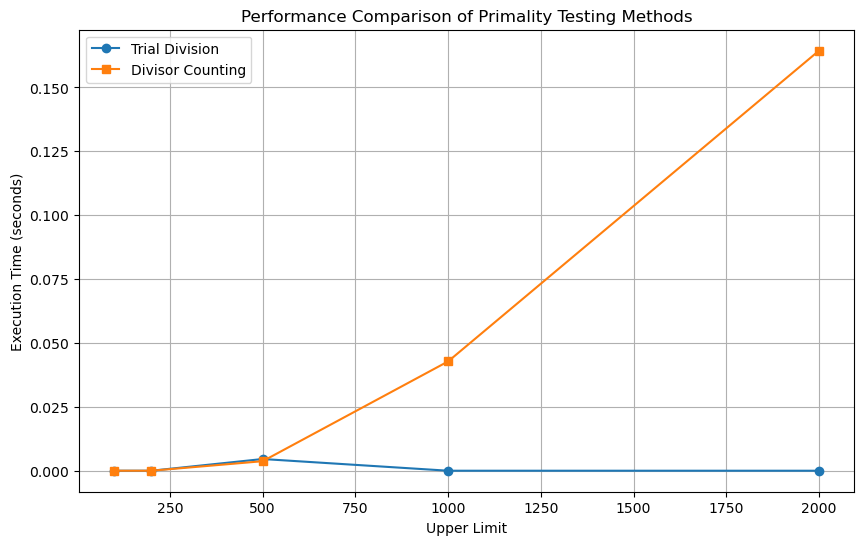

In [63]:
import matplotlib.pyplot as plt

# Compare performance of the two primality methods
def time_primality_test(method, upper_limit):
    import time
    start = time.time()
    primes = []
    for n in range(2, upper_limit + 1):
        if method(n):
            primes.append(n)
    end = time.time()
    return primes, end - start

# Test both methods with increasing upper limits
limits = [100, 200, 500, 1000, 2000]
trial_times = []
count_times = []

for limit in limits:
    _, trial_time = time_primality_test(is_prime_trial, limit)
    trial_times.append(trial_time)
    _, count_time = time_primality_test(is_prime_by_count, limit)
    count_times.append(count_time)

# Create the visualization
plt.figure(figsize=(10, 6))
plt.plot(limits, trial_times, 'o-', label='Trial Division')
plt.plot(limits, count_times, 's-', label='Divisor Counting')
plt.xlabel('Upper Limit')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison of Primality Testing Methods')
plt.legend()
plt.grid(True)
plt.show()

### Task 5: Roots

This task implements the calculation of the first 32 bits of the fractional parts of the square roots of the first 100 prime numbers. This technique is commonly used in cryptographic algorithms like SHA-256, where these fractional bits serve as initialization constants.

The process involves:
1. Generating the first 100 prime numbers
2. Calculating their square roots
3. Extracting the fractional parts
4. Converting these fractional parts to 32-bit binary representations

In [64]:
import math

# already defined how to get primes in Task 4
def get_first_100_primes():
    """Generate the first 100 prime numbers using the trial division method."""
    primes = []
    num = 2
    while len(primes) < 100:
        # Check if num is prime
        is_prime = True
        for i in range(2, int(math.sqrt(num)) + 1):
            if num % i == 0:
                is_prime = False
                break
        
        if is_prime:
            primes.append(num)
        num += 1
    
    return primes

In [65]:
def get_fractional_binary_bits(num, bit_count=32):
    """
    Extract the first n bits of the fractional part of a number in binary.
    
    Parameters:
    num (float): The input number
    bit_count (int): Number of bits to extract
    
    Returns:
    str: Binary representation of the fractional part
    """
    # Extract the fractional part
    frac_part = num - int(num)
    binary = ''
    
    # Calculate each bit
    for _ in range(bit_count):
        # Multiply by 2 and check if >= 1
        frac_part *= 2
        if frac_part >= 1:
            binary += '1'
            frac_part -= 1
        else:
            binary += '0'
            
    return binary

# Get our first 100 primes
first_100_primes = get_first_100_primes()

# Calculate the square roots and their binary fractional representations
results = []
for prime in first_100_primes:
    sqrt_val = math.sqrt(prime)
    binary_frac = get_fractional_binary_bits(sqrt_val)
    results.append((prime, sqrt_val, binary_frac))

# Print results in a clean table format
print(f"First 32 bits of the fractional parts of square roots of the first {len(results)} prime numbers:")
print("-" * 90)
print(f"{'Prime':<8} {'Square Root':<15} {'First 32 bits of fractional part'}")
print("-" * 90)

# Print all entries
for prime, sqrt_val, binary in results:
    print(f"{prime:<8} {sqrt_val:<15.10f} {binary}")

First 32 bits of the fractional parts of square roots of the first 100 prime numbers:
------------------------------------------------------------------------------------------
Prime    Square Root     First 32 bits of fractional part
------------------------------------------------------------------------------------------
2        1.4142135624    01101010000010011110011001100111
3        1.7320508076    10111011011001111010111010000101
5        2.2360679775    00111100011011101111001101110010
7        2.6457513111    10100101010011111111010100111010
11       3.3166247904    01010001000011100101001001111111
13       3.6055512755    10011011000001010110100010001100
17       4.1231056256    00011111100000111101100110101011
19       4.3588989435    01011011111000001100110100011001
23       4.7958315233    11001011101110111001110101011101
29       5.3851648071    01100010100110100010100100101010
31       5.5677643628    10010001010110010000000101011010
37       6.0827625303    00010101001

### Task 6: Proof of Work

In this task, we explore a simplified version of the "proof of work" concept, which is used in cryptocurrencies like Bitcoin. We'll do this by finding English words whose SHA-256 hashes begin with the most zero bits.

#### What is Proof of Work?

Proof of Work is a way to secure a network by requiring computers to solve a difficult problem before their input is accepted. This makes it costly for anyone to try and cheat the system.

In the case of cryptocurrencies:

- Miners try to find a number (called a *nonce*) that, when combined with block data and hashed, produces a result starting with a certain number of zeros.
- The more zeros required, the harder it is to find a valid result.
- The first miner to succeed gets rewarded with cryptocurrency.

In our version, we’re not mining anything—we’re just checking normal English words to see which ones naturally produce hashes that start with the most zeros. This gives us a simple way to understand how much effort it takes to get a hash that fits a specific pattern.

Here’s what the code will do:
1. Load a list of English words
2. Calculate the SHA-256 hash of each word
3. Count how many zero bits are at the start of each hash
4. Find and display the words with the most leading zeros



In [66]:
import hashlib

def count_leading_zeros(hash_bytes):
    """
    Count how many zeros are at the start of a hash.
    
    Args:
        hash_bytes: The hash as a byte string
    
    Returns:
        int: Number of leading zero bits
    """
    zeros = 0
    
    for byte in hash_bytes:
        if byte == 0:
            # If whole byte is zero, add 8 bits
            zeros += 8
        else:
            # Count bits in this non-zero byte
            bit_mask = 0x80  # 10000000 in binary
            while bit_mask > 0 and (byte & bit_mask) == 0:
                zeros += 1
                bit_mask >>= 1
            break
    
    return zeros


In [67]:
def find_words_with_most_zeros(dictionary_file='words.txt'):
    """
    Find words from a dictionary whose SHA-256 hash has the most leading zeros.
    
    Args:
        dictionary_file: Path to the dictionary file
        
    Returns:
        list: Top words with their hash info
    """
    best_words = []
    max_zeros = 0
    word_count = 0
    
    print(f"Reading words from {dictionary_file}...")
    try:
        with open(dictionary_file, 'r', encoding='utf-8') as f:
            for line in f:
                word = line.strip()
                if not word:
                    continue
                
                # Calculate SHA-256 hash
                hash_obj = hashlib.sha256(word.encode('utf-8'))
                digest = hash_obj.digest()
                hex_digest = hash_obj.hexdigest()
                
                # Count leading zeros
                zeros = count_leading_zeros(digest)
                
                # Update if we found a better word
                if zeros > max_zeros:
                    max_zeros = zeros
                    best_words = [(word, zeros, hex_digest)]
                    print(f"New best: '{word}' with {zeros} zeros")
                elif zeros == max_zeros:
                    best_words.append((word, zeros, hex_digest))
                    print(f"Tied for best: '{word}' with {zeros} zeros")
                
                word_count += 1
                if word_count % 10000 == 0:
                    print(f"Processed {word_count} words. Current best: {max_zeros} zeros")
        
        return best_words
    
    except FileNotFoundError:
        print(f"Dictionary file '{dictionary_file}' not found.")
        return []

# Find words with most leading zeros
best_words = find_words_with_most_zeros()

# Display results
if best_words:
    print("\nWords with the most leading zero bits in their SHA-256 hash:")
    print("-" * 70)
    print(f"{'Word':<20} {'Leading Zeros':<15} {'Hash (hex)'}")
    print("-" * 70)
    
    for word, zeros, hash_hex in best_words:
        print(f"{word:<20} {zeros:<15} {hash_hex}")
    
    print("\nThese words are from the standard English dictionary file.")
else:
    print("No results found. Make sure the words.txt file exists.")

Reading words from words.txt...
Tied for best: 'AARHUS' with 0 zeros
Tied for best: 'AARON' with 0 zeros
New best: 'ABABA' with 1 zeros
New best: 'ABACK' with 3 zeros
New best: 'ABATES' with 4 zeros
Tied for best: 'ABBOT' with 4 zeros
New best: 'ABJECT' with 5 zeros
Tied for best: 'ABLATING' with 5 zeros
New best: 'ABNORMALLY' with 8 zeros
New best: 'ABSENTEEISM' with 9 zeros
Tied for best: 'ACOUSTIC' with 9 zeros
Tied for best: 'AERODYNAMIC' with 9 zeros
Tied for best: 'AFT' with 9 zeros
New best: 'ALECK' with 10 zeros
New best: 'ANACHRONISTICALLY' with 15 zeros
New best: 'APPLICANT' with 16 zeros
Processed 10000 words. Current best: 16 zeros
Processed 20000 words. Current best: 16 zeros
Processed 30000 words. Current best: 16 zeros
Processed 40000 words. Current best: 16 zeros

Words with the most leading zero bits in their SHA-256 hash:
----------------------------------------------------------------------
Word                 Leading Zeros   Hash (hex)
-----------------------------

### Task 7: Turing Machines

This task creates a basic Turing machine that adds 1 to a binary number on its tape. It demonstrates how simple state-based logic can perform real computation.

#### What is a Turing Machine?

A Turing machine is a theoretical model made up of:
- An infinite tape divided into cells (each holding a symbol)
- A head that can read, write, and move left or right
- A set of states with rules that determine what the machine does next

Turing machines are simple but powerful—they can simulate any algorithm or computer program.

#### Our Goal

The machine starts at the left-most symbol and adds 1 to a binary number, treating the right-most digit as the least significant bit.

**Example input:**
```
100111
```

**Expected output:**
```
101000
```

This shows the carry logic in binary addition using basic state transitions.


In [68]:
class TuringMachine:
    def __init__(self, transitions, accept_states, initial_state='q0', blank_symbol='_'):
        self.transitions = transitions
        self.accept_states = accept_states
        self.initial_state = initial_state
        self.state = initial_state
        self.blank_symbol = blank_symbol
        self.head = 0
        self.tape = {}
    
    def get_symbol(self):
        return self.tape.get(self.head, self.blank_symbol)
    
    def write_symbol(self, symbol):
        self.tape[self.head] = symbol
    
    def move_head(self, direction):
        if direction == 'R':
            self.head += 1
        elif direction == 'L':
            self.head -= 1
        # 'N' means "no movement" - do nothing for this case
    
    def step(self):
        key = (self.state, self.get_symbol())
        if key not in self.transitions:
            return False
        new_state, new_symbol, move = self.transitions[key]
        self.state = new_state
        self.write_symbol(new_symbol)
        self.move_head(move)
        return True
        
    def run(self, max_steps=1000):
        steps = 0
        while steps < max_steps and self.step():
            steps += 1
        return self.state in self.accept_states
    
    def load_input(self, input_string):
        self.tape = {}
        self.head = 0
        self.state = self.initial_state
        for i, ch in enumerate(input_string):
            self.tape[i] = ch
    
    def get_output(self):
        if not self.tape:
            return ""
        min_i = min(self.tape.keys())
        max_i = max(self.tape.keys())
        return ''.join(self.tape.get(i, self.blank_symbol) for i in range(min_i, max_i + 1)).strip(self.blank_symbol)

In [69]:
def create_binary_increment_machine():
    transitions = {
        # Move to end of binary number
        ('q0', '0'): ('q0', '0', 'R'),
        ('q0', '1'): ('q0', '1', 'R'),
        ('q0', '_'): ('q1', '_', 'L'),

        # Start adding 1
        ('q1', '0'): ('q2', '1', 'N'),  # No carry
        ('q1', '1'): ('q1', '0', 'L'),  # Carry over
        ('q1', '_'): ('q2', '1', 'N'),  # All 1s → prepend 1

        # Halt
        ('q2', '0'): ('q2', '0', 'N'),
        ('q2', '1'): ('q2', '1', 'N'),
        ('q2', '_'): ('q2', '_', 'N'),
    }

    return TuringMachine(transitions, accept_states={'q2'})


In [70]:
def test_binary_increment():
    """Test the binary increment machine with various inputs."""
    machine = create_binary_increment_machine()
    
    test_cases = [
        ("0", "1"),           # 0 → 1
        ("1", "10"),          # 1 → 2
        ("10", "11"),         # 2 → 3
        ("11", "100"),        # 3 → 4
        ("100111", "101000")  # 39 → 40 (from our example)
    ]
    
    print("Binary Increment Turing Machine Tests:")
    print("-" * 50)
    
    for input_str, expected in test_cases:
        # Convert to decimal for clarity
        input_dec = int(input_str, 2)
        expected_dec = int(expected, 2)
        
        # Run the machine
        machine.load_input(input_str)
        machine.run()
        result = machine.get_output()
        result_dec = int(result, 2) if result else 0
        
        # Display results
        print(f"Input:    {input_str} (decimal {input_dec})")
        print(f"Expected: {expected} (decimal {expected_dec})")
        print(f"Result:   {result} (decimal {result_dec})")
        
        # Validate result
        if result == expected:
            print("Success!")
        else:
            print("Failed")
        print("-" * 50)
    
    print("All test cases completed.")

# Run the tests
test_binary_increment()

Binary Increment Turing Machine Tests:
--------------------------------------------------
Input:    0 (decimal 0)
Expected: 1 (decimal 1)
Result:   1 (decimal 1)
Success!
--------------------------------------------------
Input:    1 (decimal 1)
Expected: 10 (decimal 2)
Result:   10 (decimal 2)
Success!
--------------------------------------------------
Input:    10 (decimal 2)
Expected: 11 (decimal 3)
Result:   11 (decimal 3)
Success!
--------------------------------------------------
Input:    11 (decimal 3)
Expected: 100 (decimal 4)
Result:   100 (decimal 4)
Success!
--------------------------------------------------
Input:    100111 (decimal 39)
Expected: 101000 (decimal 40)
Result:   101000 (decimal 40)
Success!
--------------------------------------------------
All test cases completed.
